# PyTorch. Основы: синтаксис, torch.cuda и torch.autograd

## Задание 7.1

In [ ]:
import torch
import matplotlib.pyplot as plt
from torch.autograd import Variable

### Задача 1

1). Создайте два вещественных тензора: `a` размером (3, 4) и `b` размером (12,)   
2). Создайте тензор `c`, являющийся тензором `b`, но размера (2, 2, 3)  
3). Выведите первый столбец матрицы `a` с помощью индексации

In [ ]:
# Ваш код здесь
a = torch.FloatTensor(3, 4)
b = torch.FloatTensor(12,)
print("Tensor a:\n", a)
print("its first column: \n", a[:, 0])


Tensor a:
 tensor([[1.6896e-26, 3.0932e-41, 3.7835e-44, 0.0000e+00],
        [       nan, 3.0932e-41, 1.3733e-14, 6.4069e+02],
        [4.3066e+21, 1.1824e+22, 4.3066e+21, 6.3828e+28]])
its first column: 
 tensor([1.6896e-26,        nan, 4.3066e+21])


In [ ]:
print("Tensor b:\n", b)
c = torch.reshape(b, (2, 2, 3))
print("Tensor c:\n", c)
print(c[0][0][:] )

Tensor b:
 tensor([1.6896e-26, 3.0932e-41, 3.9236e-44, 0.0000e+00,        nan, 0.0000e+00,
        1.3733e-14, 1.2102e+25, 1.6992e-07, 2.9599e+21, 2.8175e+20, 1.7566e+25])
Tensor c:
 tensor([[[1.6896e-26, 3.0932e-41, 3.9236e-44],
         [0.0000e+00,        nan, 0.0000e+00]],

        [[1.3733e-14, 1.2102e+25, 1.6992e-07],
         [2.9599e+21, 2.8175e+20, 1.7566e+25]]])
tensor([1.6896e-26, 3.0932e-41, 3.9236e-44])


### Задача 2

1). Создайте два вещественных тензора: `a` размером (5, 2) и `b` размером (1,10)   
2). Создайте тензор `c`, являющийся тензором `b`, но размера (5, 2)  
3). Произведите все арифметические операции с тензорами `a` и `c`

In [ ]:
# Ваш код здесь
a = torch.FloatTensor(5, 2)
b = torch.FloatTensor(1, 10)
c = b.view(5, 2)

z1 = a.add(c) 
z2 = a.mul(c)
z3 = a.sub(c)
z4 = a.div(c)
z5 = a ** c

### Задача 3

1). Создайте тензор *целых чисел* `images` размерности (100, 200, 200, 3) (можно интерпретировать это как 100 картинок размера 200х200 с тремя цветовыми каналами, то есть 100 цветных изображений 200х200). Заполните его нулями  

2). Сделайте так, чтобы у $i$-ой по порядку картинки была нарисована белая полоса толщиной два пикселя в строках, которые соответствуют номеру картинки. Например, у 3-ей по порядку картинки белая полоска будет занимать 6 и 7 строки, у 99 - 198 и 199. Сделать белую строку можно, записав в ячейки тензора число 255 (по всем трём каналам). Выведите несколько примеров с помощью `pylot`  

3). Посчитайте среднее тензора `images` по 1-ой оси (по сути - средняя картинка), умножьте полученный тензор на 70. Нарисуйте с помощью `pyplot`, должна получиться серая картинка (при взятии среднего нужно привести тензор к float с помощью `.float()`, при отрисовке обратно к int с помощью `.int()`)

In [ ]:
# Ваш код здесь
images = torch.zeros(100, 200, 200, 3)
for i in range(100):
  images[i][2*i][:][:] = 255
  images[i][2*i+1][:][:] = 255
images = images.int() 

<Figure size 432x288 with 0 Axes>

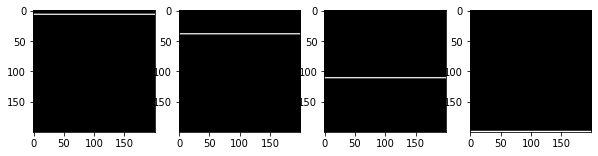

In [ ]:
plt.figure()
f, axarr = plt.subplots(1, 4)
f.set_figwidth(10)
f.set_figheight(8)
axarr[0].imshow(images[3])
axarr[1].imshow(images[19])
axarr[2].imshow(images[55])
axarr[3].imshow(images[99])

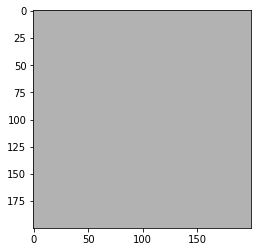

In [ ]:
images = images.float()
image_gray = torch.mean(images, dim=0)
image_gray *= 70
image_gray = image_gray.int()
plt.imshow(image_gray)

### Задача 4

- В Colab нажмите в меню сверху: `Runtime` -> `Change Runtime Type` -> `GPU`, где изначально стоит `None` (`Среда выполнение` - `Сменить среду выполнения`)
- Объявите тензор `a` размера (2, 3, 4) и тензор `b` размера (1, 8, 3) на GPU, иницилизируйте их случайно равномерно (`.uniform_()`)
- Затем измените форму тензора `b`, чтобы она совпадала с формой тензора `a`, получите тензор `c`  
- Переместите `c` на CPU, переместите `a` на CPU  
- Оберните их в `Variable()`
- Объявите тензор `L = torch.mean((c - a) `**` 2)` и посчитайте градиент `L` по `c` ( то есть $\frac{\partial{L}}{\partial{c}})$
- Выведите градиент `L` по `c`

In [ ]:
# Ваш код здесь
a = torch.FloatTensor(2, 3, 4).uniform_().cuda()
b = torch.FloatTensor(1, 8, 3).uniform_().cuda()
print(a.is_cuda)
print(b.is_cuda)

True
True


In [ ]:
c = Variable(b.reshape(2, 3, 4).cpu(), requires_grad=True)
a = Variable(a.cpu()) 
print(a.is_cuda)
print(c.is_cuda)

False
False


In [ ]:
L = torch.mean((c - a)**2)
L.backward()
print(c.grad)

tensor([[[-0.0306,  0.0363,  0.0133,  0.0332],
         [ 0.0295,  0.0222,  0.0378,  0.0426],
         [ 0.0001,  0.0513, -0.0238,  0.0581]],

        [[-0.0616,  0.0124, -0.0091,  0.0124],
         [-0.0130,  0.0343,  0.0812, -0.0057],
         [-0.0039,  0.0353,  0.0167,  0.0223]]])
